In [76]:
%matplotlib inline
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import uncertainties as unc
from uncertainties import unumpy as unp
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy as sp
import sympy as sym
import pandas as pd
import ROOT as rt
import root_numpy as rnp
import seaborn as sns
sns.set()

#Laden des Latex fonts 
plt.rcParams['text.latex.preamble']=["\\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

#Größe der Achsenbeschriftung
axis_font = {'size':'14'}

# Pfade
path_graphics = "../Grafiken/"

In [208]:
# Funktionen
# Achsenbeschriftungen
def axis_label(label,sym=None,unit=None):
    if sym == None:
        print(1)
        return lable
    elif unit == None:
        print(2)
        r"".join([label," ${s}$".format(s=sym)])
    else:
        print(3)
        return r"".join([label," ${s}/\mathrm{{{u}}}$".format(s=sym,u=unit)])

## Vorbereitungsaufgaben

Nullstellen 1000mm: [ 1400.]
Stabilitätsparameter 1000mm: [  4.93038066e-32]

Nullstellen 1400mm: [ 1000.  1400.]
Stabilitätsparameter 1400mm: [  0.00000000e+00   8.88178420e-17]

Maximalstellen 1000mm: [    0.  2800.]
Stabilitätsparameter 1000mm: [ 1.  1.]

Maximalstellen 1400mm: [    0.  2400.]
Stabilitätsparameter 1400mm: [ 1.  1.]

3
2
2
None


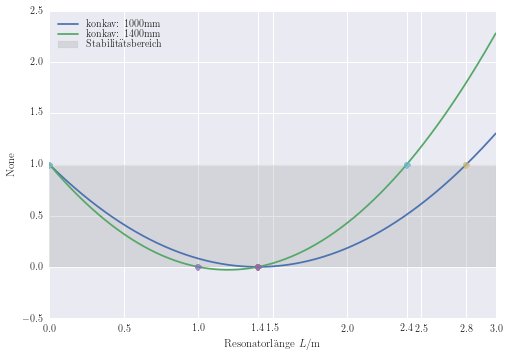

In [210]:
def stability_condition(L, r_1, r_2=None):
    g_1 = 1 - L/r_1
    if r_2 == None:
        g_2 = 1
    else:
        g_2 = 1 - L/r_2
    return g_1 * g_2 

# Minimum der Kurven => Maximum der Länge
def maximum_resonator_length(r_1,r_2):
    return (r_1 + r_2)/2
    


# Resonatorlängen
resonator_length = np.arange(0,3,0.001)
zeros = np.zeros_like(resonator_length)
mirror_radii = {'OC':1.4,'flat':None,'HR1':1.4,'HR2':1.0}

# Array der Stabilitätsparameter
# Stabilitätsparameter für zwei unteschiedliche Radien: 1400mm; 1000mm
stability_hr1 = stability_condition(resonator_length, mirror_radii["OC"],mirror_radii["HR1"])
# Stabilitätsparameter für zwei gleiche Radien: 1400mm
stability_hr2 = stability_condition(resonator_length, mirror_radii["OC"],mirror_radii["HR2"])

zero_crossing_L_hr1 = np.where((stability_hr1<1e-07)&(stability_hr1>-1e-07))[0]
zero_crossing_L_hr2 = np.where((stability_hr2<1e-07)&(stability_hr2>-1e-07))[0]

zero_crossing_hr1 = np.array([zero_crossing_L_hr1,[stability_hr1[i] for i in zero_crossing_L_hr1]])
zero_crossing_hr2 = np.array([zero_crossing_L_hr2,[stability_hr2[i] for i in zero_crossing_L_hr2]])

print("Nullstellen 1000mm:", zero_crossing_hr1[0])
print("Stabilitätsparameter 1000mm:",zero_crossing_hr1[1],end="\n\n")
print("Nullstellen 1400mm:",zero_crossing_hr2[0])
print("Stabilitätsparameter 1400mm:",zero_crossing_hr2[1],end="\n\n")

one_crossing_L_hr1 = np.where((stability_hr1<1+1e-07)&(stability_hr1>1-1e-07))[0]
one_crossing_L_hr2 = np.where((stability_hr2<1+1e-07)&(stability_hr2>1-1e-07))[0]

one_crossing_hr1 = np.array([one_crossing_L_hr1,[stability_hr1[i] for i in one_crossing_L_hr1]])
one_crossing_hr2 = np.array([one_crossing_L_hr2,[stability_hr2[i] for i in one_crossing_L_hr2]])
print("Maximalstellen 1000mm:", one_crossing_hr1[0])
print("Stabilitätsparameter 1000mm:",one_crossing_hr1[1],end="\n\n")
print("Maximalstellen 1400mm:", one_crossing_hr2[0])
print("Stabilitätsparameter 1400mm:", one_crossing_hr2[1],end="\n\n")

# Plot

# Plot des Bereichs zwischen 0 und 1
plt.barh(0,3,height=1,color="gray",alpha=0.2,edgecolor="gray",label="Stabilitätsbereich")
# Plot der Graphen
plt.plot(resonator_length,stability_hr1,label="konkav: 1000mm")
plt.plot(resonator_length,stability_hr2,label="konkav: 1400mm")
#Plot der Stellen
plt.plot(zero_crossing_hr1[0]/1000,zero_crossing_hr1[1]/1000,"o",alpha=0.75)
plt.plot(zero_crossing_hr2[0]/1000,zero_crossing_hr2[1]/1000,"o",alpha=0.75)
plt.plot(one_crossing_hr1[0]/1000,one_crossing_hr1[1],"o",alpha=0.75)
plt.plot(one_crossing_hr2[0]/1000,one_crossing_hr2[1],"o",alpha=0.75)
#
ax = plt.gca()
xticks = [0.0,0.5,1.0,1.5,2.0,2.5,3.0]
for hr1 in zero_crossing_hr1[0]:
    xticks.append(hr1/1000)
for hr1,hr2 in zip(one_crossing_hr1[0],one_crossing_hr2[0]):
    if not hr1/1000 in xticks:
        xticks.append(hr1/1000)
    if not hr2/1000 in xticks:
        xticks.append(hr2/1000)
    
ax.xaxis.set_ticks(xticks)

# Ploteinstellungen 
plt.xlabel(axis_label("Resonatorlänge",sym="L",unit="m"))
plt.ylabel(axis_label("Stabilitätsparameter",sym="g_1\cdot g_2"))
print(axis_label("Stabilitätsparameter",sym="g_1\cdot g_2"))
# Plot der Legende
plt.legend(loc="best",frameon=False,labelspacing=0.15)

plt.savefig(path_graphics+"Stabilitaetsparameter.pdf")